<a href="https://colab.research.google.com/github/riyagharat/CAP-5619/blob/main/01_artificial_intelligence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='http://hilpisch.com/taim_logo.png' width="350px" align="right">

# Artificial Intelligence in Finance

## Artificial Intelligence

Dr Yves J Hilpisch | The AI Machine

http://aimachine.io | http://twitter.com/dyjh

## Unsupervised Learning

In [ ]:
import numpy as np
import pandas as pd
from pylab import plt, mpl
plt.style.use('seaborn-v0_8')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
np.set_printoptions(precision=4, suppress=True)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [ ]:
x, y = make_blobs(n_samples=100, centers=4,
                  random_state=500, cluster_std=10.25)

In [ ]:
model = KMeans(n_clusters=5, random_state=0, n_init='auto')

In [ ]:
model.fit(x)

KMeans(n_clusters=5, random_state=0)

In [ ]:
y_ = model.predict(x)

In [ ]:
y_

array([4, 3, 0, 4, 2, 4, 3, 2, 0, 2, 3, 3, 1, 2, 1, 3, 2, 1, 1, 3, 4, 2,
       2, 2, 2, 4, 1, 2, 2, 3, 2, 2, 4, 1, 2, 3, 4, 1, 3, 2, 0, 2, 1, 1,
       3, 3, 2, 2, 0, 2, 4, 1, 4, 2, 0, 3, 2, 1, 0, 3, 4, 2, 0, 3, 4, 3,
       2, 0, 2, 2, 1, 0, 1, 3, 0, 2, 4, 2, 2, 2, 2, 1, 2, 3, 2, 3, 3, 4,
       3, 2, 3, 4, 4, 3, 3, 1, 1, 2, 2, 3], dtype=int32)

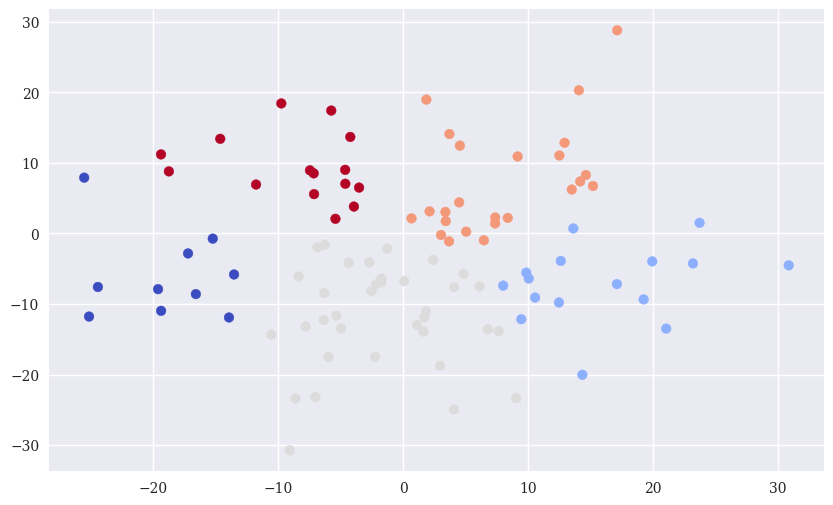

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0], x[:, 1], c=y_,  cmap='coolwarm');

## Reinforcement Learning

Reinforcement learning is also called learmning by experience. You simulate a game and try to learn a task in an environment, such as driving a car. The following example is based on a coin tossing game that is played with a coin that lands 80% of the time on heads and 20% of the time on tails (below in the code ssp contains five values, four of them are 1s). The coin tossing game is heavily biased to emphasize the benefits of learning as compared to an uninformed baseline algorithm. The baseline algorithm, which bets randomly and equally distributes on heads and tails, achieves a total reward of around 50, on average, per epoch of 100 bets played:

In [ ]:
ssp = [1, 1, 1, 1, 0]#The state space (1 = heads, 0 = tails).

In [ ]:
asp = [1, 0]#The action space (1 = bet on heads, 0 = bet on tails) is the possible actions one can take.

In [ ]:
def epoch():
    tr = 0
    for _ in range(100):
        a = np.random.choice(asp)#An action is randomly chosen from the action space.
        s = np.random.choice(ssp)#A state is randomly chosen from the state space.
        if a == s:
            tr += 1#The total reward tr is increased by one if the bet is correct.
    return tr

In [ ]:
rl = np.array([epoch() for _ in range(15)])#The game is played for a number of epochs; each epoch is 100 bets.
rl

array([51, 44, 44, 54, 44, 54, 52, 50, 39, 55, 47, 51, 55, 48, 45])

In [ ]:
rl.mean()#The average total reward of the epochs played is calculated.

50.46666666666667

Reinforcement learning tries to learn from what is observed after an action is taken, usually based on a reward. To keep things simple, the following learning algorithm only keeps track of the states that are observed in each round insofar as they are appended to the action space list object. In this way, the algorithm learns the bias in the game, though maybe not perfectly. By randomly sampling from the updated action space, the bias is reflected because naturally the bet will more often be heads. Over time, heads is chosen, on average, around 80% of the time. The average total reward of around 65 reflects the improvement of the learning algorithm as compared to the uninformed baseline algorithm.*italicized text*

In [ ]:
ssp = [1, 1, 1, 1, 0]

In [ ]:
def epoch():
    tr = 0
    asp = [0, 1]#Resets the action space before starting (over) in each episode
    for _ in range(100):
        a = np.random.choice(asp)
        s = np.random.choice(ssp)
        if a == s:
            tr += 1
        asp.append(s)#Main difference with the previous version! Adds the observed state to the action space. asp will now have previous actions appended to it. hence as we have more 1s, asp will contain more 1s and randomly choosing a value fro a will choose more 1s
    return tr

In [ ]:
rl = np.array([epoch() for _ in range(15)])
rl

array([61, 81, 69, 64, 68, 56, 75, 62, 63, 76, 71, 60, 69, 71, 70])

In [ ]:
rl.mean()

67.73333333333333

## Supervised Learning

### OLS Regression

In [ ]:
def f(x):
    return 2 * x ** 2 - x ** 3 / 3

In [ ]:
x = np.linspace(-2, 4, 25)## Create a linearly spaced array from -2 to 4 with 25 points
x

array([-2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,
        0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,
        2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ])

In [ ]:
y = f(x)
y

array([10.6667,  7.9115,  5.625 ,  3.776 ,  2.3333,  1.2656,  0.5417,
        0.1302,  0.    ,  0.1198,  0.4583,  0.9844,  1.6667,  2.474 ,
        3.375 ,  4.3385,  5.3333,  6.3281,  7.2917,  8.1927,  9.    ,
        9.6823, 10.2083, 10.5469, 10.6667])

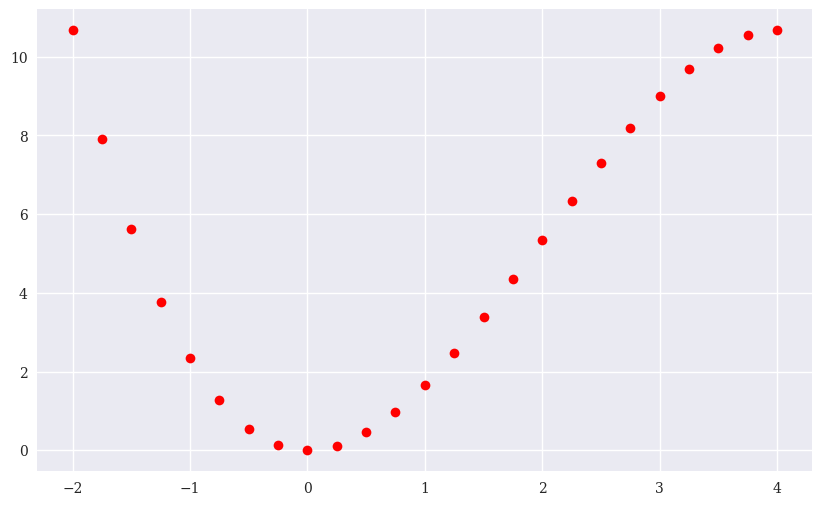

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro');

In [ ]:
beta = np.cov(x, y, ddof=0)[0, 1] / np.var(x)
beta

1.0541666666666667

The expression np.cov(x, y, ddof=0)[0, 1] / np.var(x) calculates the slope (β) of the simple linear regression line of y on x using statistical properties of the data.  


In [ ]:
alpha = y.mean() - beta * x.mean()
alpha

3.8625000000000003

In [ ]:
y_ = alpha + beta * x# this is our statistical model that we learned by assuming that a line of a+bx can fit to our data (this is a wrong assumption as we will see soon)

Mean Squared Error (MSE) is a fundamental metric in statistics and machine learning that quantifies the average squared difference between observed actual values and the values predicted by a model. It serves as a measure of the quality of an estimator or predictive model, with lower MSE values indicating better model performance.

In [ ]:
MSE = ((y - y_) ** 2).mean()# y is the real value, y_ is the predicted one.
MSE

10.721953125

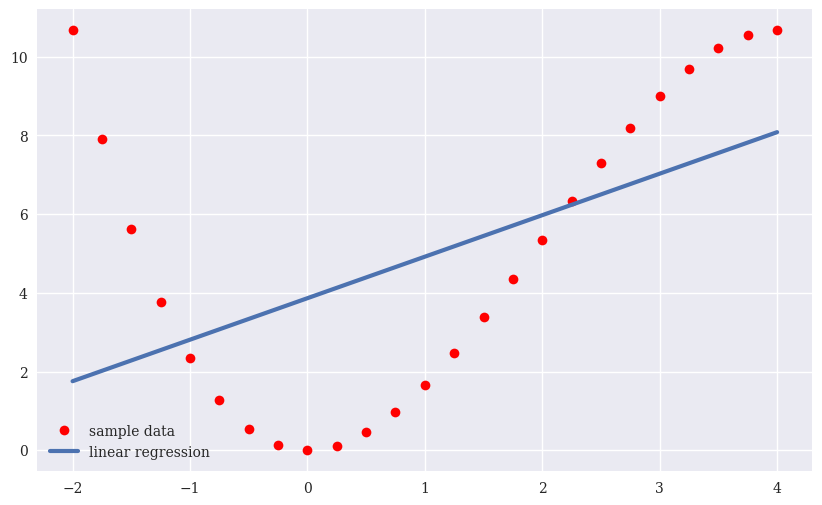

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
plt.plot(x, y_, lw=3.0, label='linear regression')
plt.legend();# the blue line that represents our model does not fit the real data (red dots) at all. We have actually underfit the data

In machine learning, achieving a model that generalizes well to new, unseen data is crucial. Two common pitfalls that hinder this goal are underfitting and overfitting.

Underfitting occurs when a model is too simplistic to capture the underlying patterns in the training data (as is our model above). This inadequacy leads to poor performance on both the training set and new data. Causes of underfitting include overly simple models, insufficient training time, or inadequate features. For example, using a linear model to fit data that has a complex, non-linear relationship can result in underfitting.


Overfitting, on the other hand, happens when a model learns the training data, including its noise and outliers, too well. This results in excellent performance on the training set but poor generalization to new data. Overfitting often arises with overly complex models that have too many parameters relative to the amount of training data. For instance, a decision tree that is allowed to grow without constraints may capture noise in the training data, leading to overfitting.




deg=1 | MSE=10.72195
deg=2 | MSE=2.31258
deg=3 | MSE=0.00000


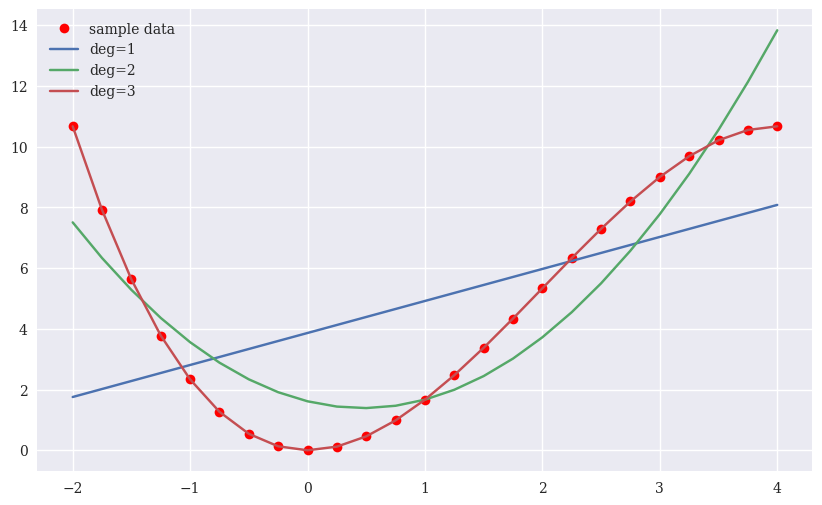

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
for deg in [1, 2, 3]:
    reg = np.polyfit(x, y, deg=deg)
    y_ = np.polyval(reg, x)
    MSE = ((y - y_) ** 2).mean()
    print(f'deg={deg} | MSE={MSE:.5f}')
    plt.plot(x, np.polyval(reg, x), label=f'deg={deg}')
plt.legend();

In [ ]:
reg# the final model has degree 3: y=dx^3+cx^2+bx+a, y=−0.3333⋅x^3+2⋅x^2

array([-0.3333,  2.    ,  0.    , -0.    ])

## Neural Network &mdash; `sklearn`

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
model = MLPRegressor(hidden_layer_sizes=3 * [256],
                     learning_rate_init=0.03,
                     max_iter=5000)

In [ ]:
model.fit(x.reshape(-1, 1), y)

MLPRegressor(hidden_layer_sizes=[256, 256, 256], learning_rate_init=0.03,
             max_iter=5000)

reshape(-1, 1):

-1: This tells NumPy to automatically determine the appropriate number of rows based on the original array's size and the specified number of columns. In this case, it infers n_samples rows.

1: This specifies that there should be one column, indicating a single feature.

In [ ]:
y_ = model.predict(x.reshape(-1, 1))

In [ ]:
MSE = ((y - y_) ** 2).mean()
MSE

0.011125048843042109

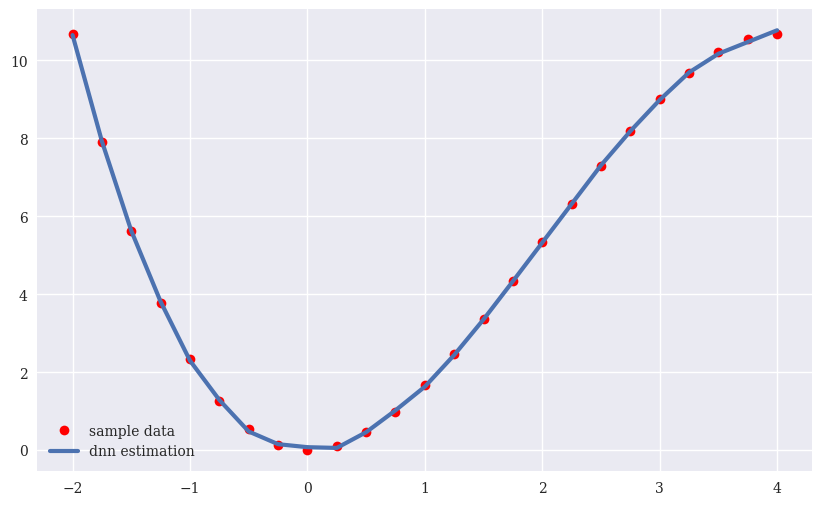

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
plt.plot(x, y_, lw=3.0, label='dnn estimation')
plt.legend();

### Neural Network &mdash; `Keras`

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [ ]:
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(100)

In [ ]:
from keras.layers import Dense
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=1)) # Adds a densely connected hidden layer with rectified linear unit (ReLU) activation
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
((y - y_) ** 2).mean()

0.011125048843042109

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
round=1 | MSE=2.80263
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
round=2 | MSE=0.71442
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
round=3 | MSE=0.23109
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
round=4 | MSE=0.11652
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
round=5 | MSE=0.08613


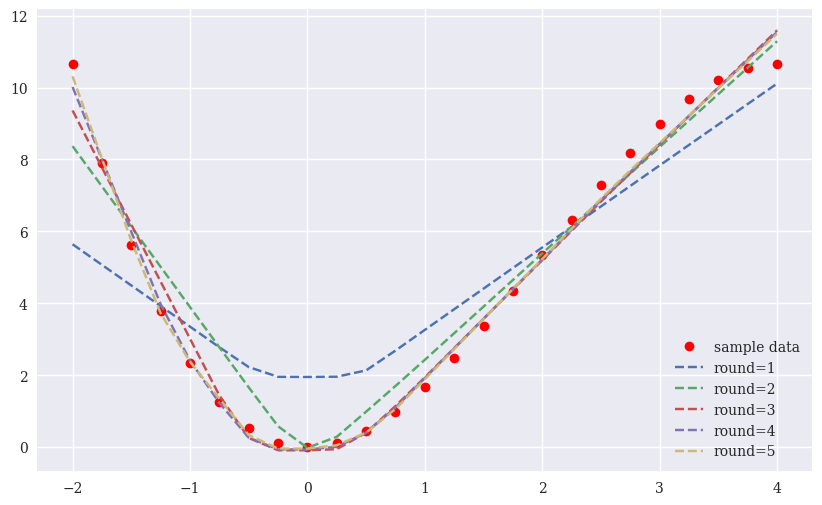

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
for _ in range(1, 6):
    model.fit(x, y, epochs=100, verbose=False)
    y_ =  model.predict(x)
    MSE = ((y - y_.flatten()) ** 2).mean()
    print(f'round={_} | MSE={MSE:.5f}')
    plt.plot(x, y_, '--', label=f'round={_}')
plt.legend();

## Universal Approximation

In [ ]:
np.random.seed(0)
x = np.linspace(-1, 1)
y = np.random.random(len(x)) * 2 - 1

deg= 1 | MSE=0.28153
deg= 5 | MSE=0.27331
deg= 9 | MSE=0.25442
deg=11 | MSE=0.23458
deg=13 | MSE=0.22989
deg=15 | MSE=0.21672


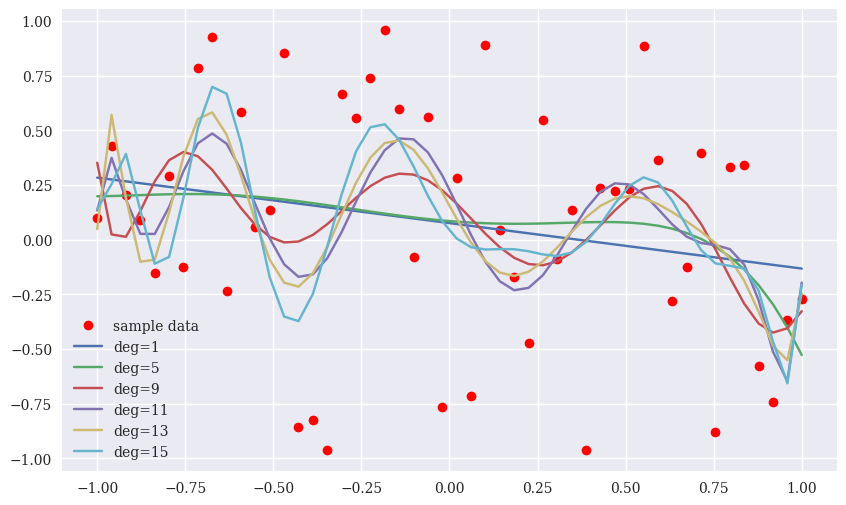

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
for deg in [1, 5, 9, 11, 13, 15]:
    reg = np.polyfit(x, y, deg=deg)
    y_ = np.polyval(reg, x)
    MSE = ((y - y_) ** 2).mean()
    print(f'deg={deg:2d} | MSE={MSE:.5f}')
    plt.plot(x, np.polyval(reg, x), label=f'deg={deg}')
plt.legend();

The results for the OLS regression are not too surprising. OLS regression in this case assumes that the approximation can be achieved through an appropriate combination of a finite number of basis functions. Since the sample data set has been generated randomly, the OLS regression does not perform well in this case.

In [ ]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=1))
for _ in range(3):
    model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
!pip install visualkeras

import visualkeras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 14.7 MB/s eta 0:00:00


the model consists of an input layer accepting a single feature, followed by four hidden layers each with 256 neurons and ReLU activation functions, and an output layer with a single neuron and a linear activation function.

In Keras, when you create layers without explicitly assigning names, the framework automatically generates default names for them. These names typically follow the pattern dense, dense_1, dense_2, and so on, incrementing with each new layer of the same type.

In [ ]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 256)                 │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 198,145 (774.00 KB)

 Trainable params: 198,145 (774.00 KB)

 Non-trainable params: 0 (0.00 B)

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
round=1 | MSE=0.13561
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
round=2 | MSE=0.11445
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
round=3 | MSE=0.05851
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
round=4 | MSE=0.06733
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
round=5 | MSE=0.05231
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
round=6 | MSE=0.07694
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
round=7 | MSE=0.01060
CPU times: user 2min 8s, sys: 5.1 s, total: 2min 13s
Wall time: 2min 34s


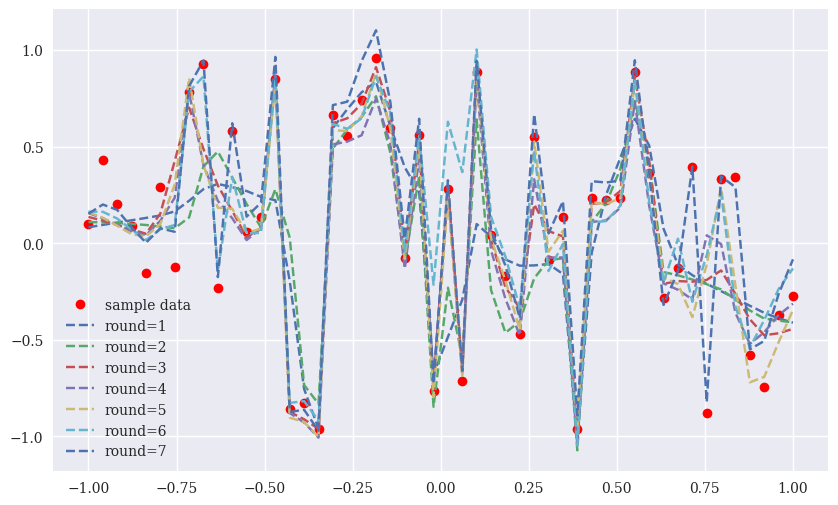

In [ ]:
%%time
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
for _ in range(1, 8):
    model.fit(x, y, epochs=500, verbose=False)
    y_ =  model.predict(x)
    MSE = ((y - y_.flatten()) ** 2).mean()
    print(f'round={_} | MSE={MSE:.5f}')
    plt.plot(x, y_, '--', label=f'round={_}')
plt.legend();

While the end result is not perfect, it is obvious that the neural network performs better than the OLS regression in estimating the random label values from the random features values. Given its architecture, however, the neural network has almost 200,000 trainable parameters (weights), which offers relatively high flexibility, particularly when compared to the OLS regression, for which a maximum of 15 + 1 parameters are used:

## Importance of Big Data

In [ ]:
f = 5
n = 10

In [ ]:
np.random.seed(100)

In [ ]:
x = np.random.randint(0, 2, (n, f))
x

array([[0, 0, 1, 1, 1],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 0, 1]])

In [ ]:
y = np.random.randint(0, 2, n)
y

array([1, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [ ]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=f))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop',
             metrics=['acc'])

In [ ]:
hist = model.fit(x, y, epochs=50, verbose=False)

In [ ]:
y_ = np.where(model.predict(x).flatten() > 0.5, 1, 0)
y_

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


array([1, 1, 0, 0, 0, 1, 0, 1, 0, 1])

In [ ]:
y == y_

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True])

In [ ]:
res = pd.DataFrame(hist.history)

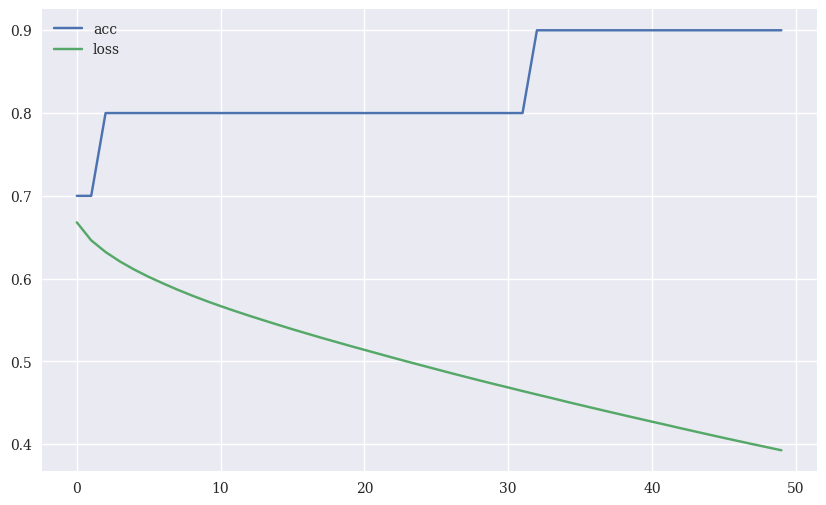

In [ ]:
res.plot(figsize=(10, 6));

In [ ]:
f = 10
n = 250

In [ ]:
np.random.seed(100)

In [ ]:
x = np.random.randint(0, 2, (n, f))
x[:4]

array([[0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 1, 0, 0, 0, 1, 1, 1, 0, 0],
       [1, 0, 0, 1, 1, 1, 1, 1, 0, 0]])

In [ ]:
y = np.random.randint(0, 2, n)
y[:4]

array([0, 1, 0, 0])

In [ ]:
2 ** f

1024

In [ ]:
fcols = [f'f{_}' for _ in range(f)]
fcols

['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9']

In [ ]:
data = pd.DataFrame(x, columns=fcols)
data['l'] = y

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   f0      250 non-null    int64
 1   f1      250 non-null    int64
 2   f2      250 non-null    int64
 3   f3      250 non-null    int64
 4   f4      250 non-null    int64
 5   f5      250 non-null    int64
 6   f6      250 non-null    int64
 7   f7      250 non-null    int64
 8   f8      250 non-null    int64
 9   f9      250 non-null    int64
 10  l       250 non-null    int64
dtypes: int64(11)
memory usage: 21.6 KB


In [ ]:
grouped = data.groupby(list(data.columns))

In [ ]:
freq = grouped['l'].size().unstack(fill_value=0)

In [ ]:
freq['sum'] = freq[0] + freq[1]

In [ ]:
freq.head(10)

l                              0  1  sum
f0 f1 f2 f3 f4 f5 f6 f7 f8 f9           
0  0  0  0  0  0  0  1  1  1   0  1    1
                  1  0  1  0   1  1    2
                           1   0  1    1
               1  0  0  0  0   1  0    1
                           1   0  1    1
                     1  1  1   0  1    1
                  1  0  0  0   0  1    1
                        1  0   0  1    1
            1  0  0  0  1  1   1  0    1
                  1  1  0  0   1  0    1

In [ ]:
freq['sum'].describe().astype(int)

,sum
count,227
mean,1
std,0
min,1
25%,1
50%,1
75%,1
max,2


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [ ]:
model = MLPClassifier(hidden_layer_sizes=[128, 128, 128],
                      max_iter=1000, random_state=100)

In [ ]:
model.fit(data[fcols], data['l'])

MLPClassifier(hidden_layer_sizes=[128, 128, 128], max_iter=1000,
              random_state=100)

In [ ]:
accuracy_score(data['l'], model.predict(data[fcols]))

0.952

In [ ]:
split = int(len(data) * 0.7)

In [ ]:
train = data[:split]
test = data[split:]

In [ ]:
model.fit(train[fcols], train['l'])

MLPClassifier(hidden_layer_sizes=[128, 128, 128], max_iter=1000,
              random_state=100)

In [ ]:
accuracy_score(train['l'], model.predict(train[fcols]))

0.9714285714285714

In [ ]:
accuracy_score(test['l'], model.predict(test[fcols]))

0.38666666666666666

In [ ]:
factor = 50

In [ ]:
big = pd.DataFrame(np.random.randint(0, 2, (factor * n, f)),
                   columns=fcols)

In [ ]:
big['l'] = np.random.randint(0, 2, factor * n)

In [ ]:
train = big[:split]
test = big[split:]

In [ ]:
model.fit(train[fcols], train['l'])

MLPClassifier(hidden_layer_sizes=[128, 128, 128], max_iter=1000,
              random_state=100)

In [ ]:
accuracy_score(train['l'], model.predict(train[fcols]))

0.9657142857142857

In [ ]:
accuracy_score(test['l'], model.predict(test[fcols]))

0.5043407707910751

In [ ]:
grouped = big.groupby(list(data.columns))

In [ ]:
freq = grouped['l'].size().unstack(fill_value=0)

In [ ]:
freq['sum'] = freq[0] + freq[1]

In [ ]:
freq.head(6)

l                               0  1  sum
f0 f1 f2 f3 f4 f5 f6 f7 f8 f9            
0  0  0  0  0  0  0  0  0  0   10  9   19
                           1    5  4    9
                        1  0    2  5    7
                           1    6  6   12
                     1  0  0    9  8   17
                           1    7  4   11

In [ ]:
freq['sum'].describe().astype(int)

,sum
count,1024
mean,12
std,3
min,2
25%,10
50%,12
75%,15
max,26


In [ ]:
8 ** 25

37778931862957161709568

<img src='http://hilpisch.com/taim_logo.png' width="350px" align="right">

<br><br><br><a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:ai@tpq.io">ai@tpq.io</a>